In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Dataset\combined_metrics.csv')

print(df.head())


     Mean_X  Std Dev_X  Energy_X  Entropy_X  Peaks_X    Mean_Y  Std Dev_Y  \
0  0.025967   0.149649  2.284523 -10.269194       17  0.019115   0.236742   
1  0.024132   0.149547  2.272307 -10.310649       16  0.020332   0.237447   
2  0.021001   0.150147  2.275984  -9.992131       16  0.021384   0.237961   
3  0.019992   0.149930  2.265391 -10.067565       16  0.025724   0.243507   
4  0.019370   0.149982  2.264473 -10.036759       17  0.029207   0.246331   

   Energy_Y  Entropy_Y  Peaks_Y  ...  Std Dev_Z  Energy_Z  Entropy_Z  Peaks_Z  \
0  5.585155  -1.251265       20  ...   0.114890  1.308246 -17.827970       20   
1  5.623074  -1.204877       20  ...   0.116141  1.338520 -17.687143       20   
2  5.651662  -1.171929       20  ...   0.116818  1.355477 -17.593953       19   
3  5.936428  -0.909256       20  ...   0.117885  1.382936 -17.495941       19   
4  6.092519  -0.772432       21  ...   0.118369  1.396498 -17.422948       18   

   Mean_Mixed  Std Dev_Mixed  Energy_Mixed  Entrop

In [2]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 Mean_X  Std Dev_X  Energy_X  Entropy_X   Peaks_X    Mean_Y  \
Mean_X         1.000000   0.195856  0.180968   0.031733  0.219089  0.237430   
Std Dev_X      0.195856   1.000000  0.926084   0.225076 -0.315846  0.372694   
Energy_X       0.180968   0.926084  1.000000   0.193077 -0.144643  0.319165   
Entropy_X      0.031733   0.225076  0.193077   1.000000  0.079551  0.087750   
Peaks_X        0.219089  -0.315846 -0.144643   0.079551  1.000000 -0.088033   
Mean_Y         0.237430   0.372694  0.319165   0.087750 -0.088033  1.000000   
Std Dev_Y      0.148401   0.935879  0.882717   0.226232 -0.217986  0.400870   
Energy_Y       0.126283   0.842840  0.891406   0.189344 -0.056995  0.376251   
Entropy_Y      0.003991   0.038817  0.028277   0.968261  0.081285  0.017032   
Peaks_Y        0.023853   0.201248  0.278306   0.186840  0.609407  0.264181   
Mean_Z         0.030157  -0.448899 -0.463219  -0.085389  0.219776 -0.202668   
Std Dev_Z      0.202054   0.940170  0.904116   0.214

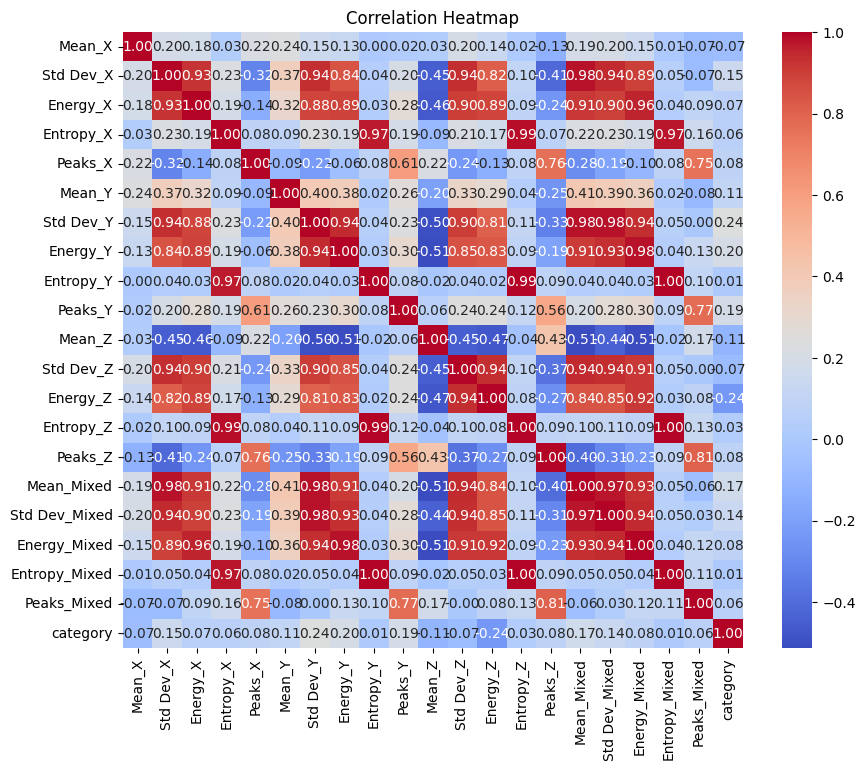

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


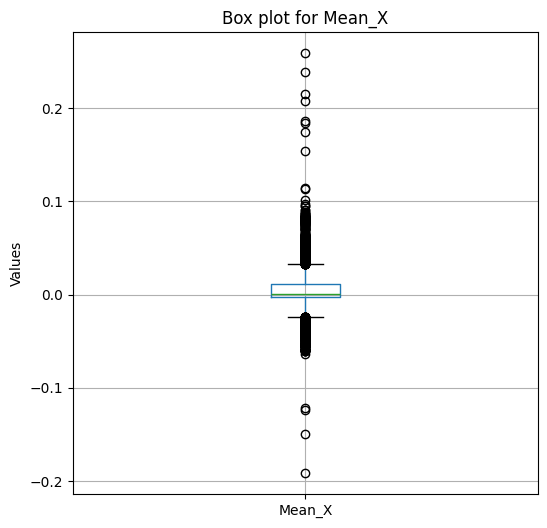

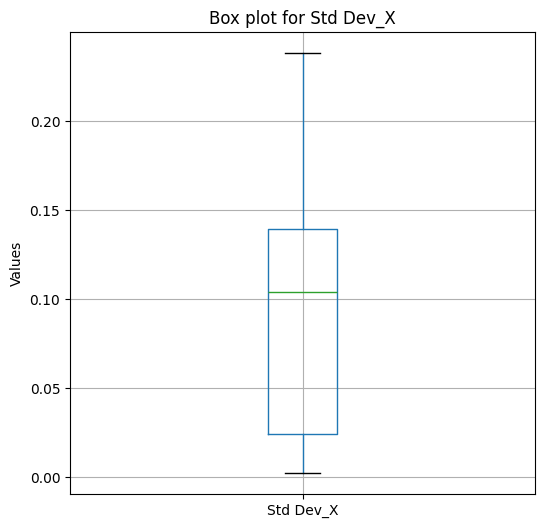

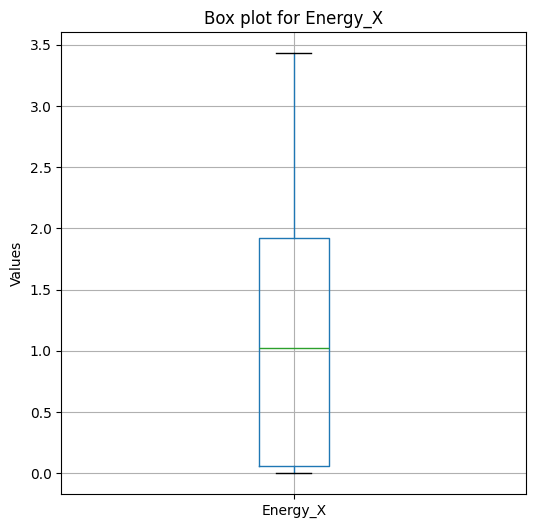

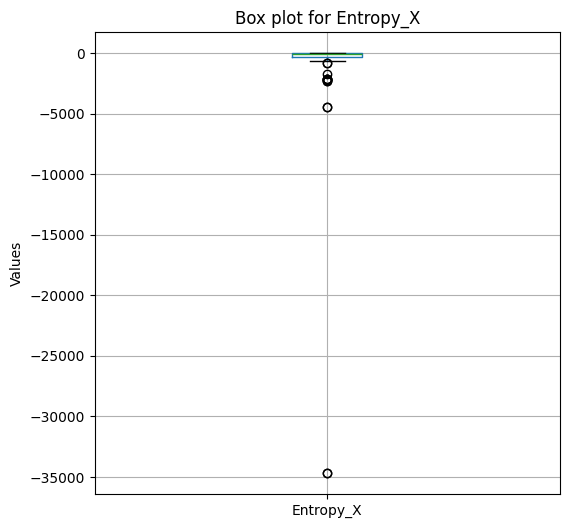

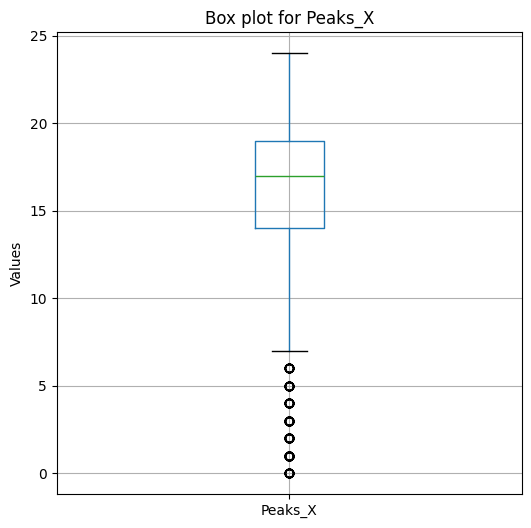

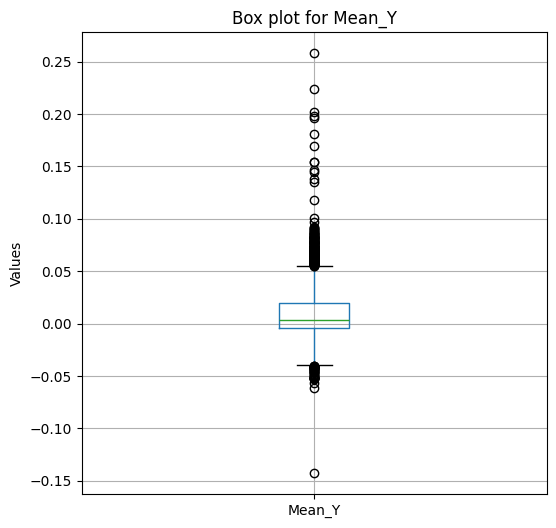

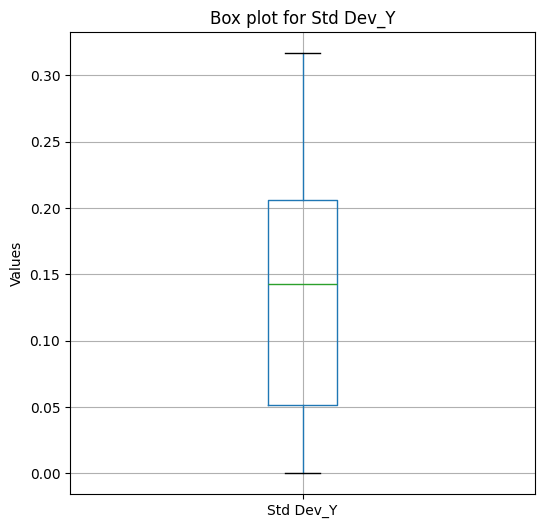

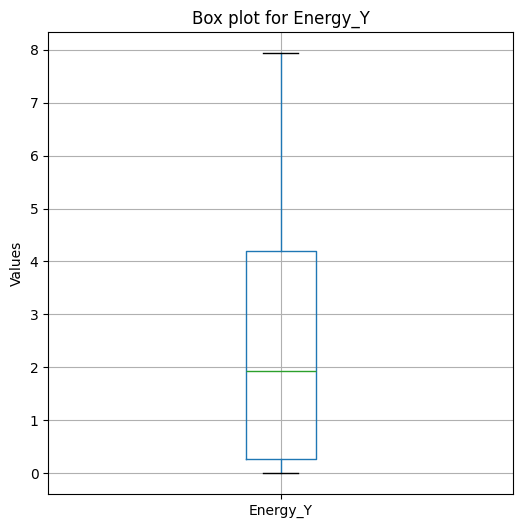

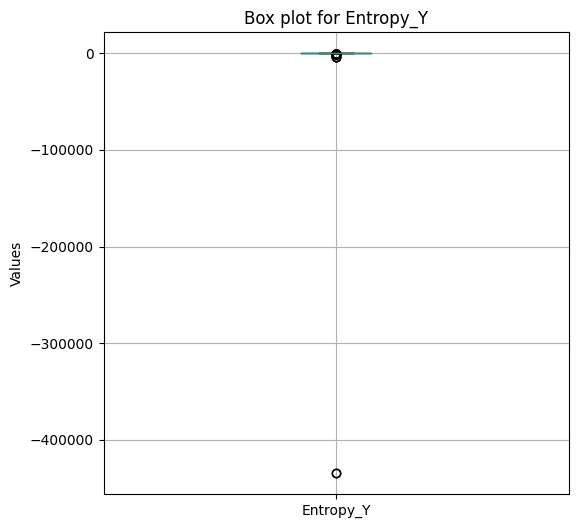

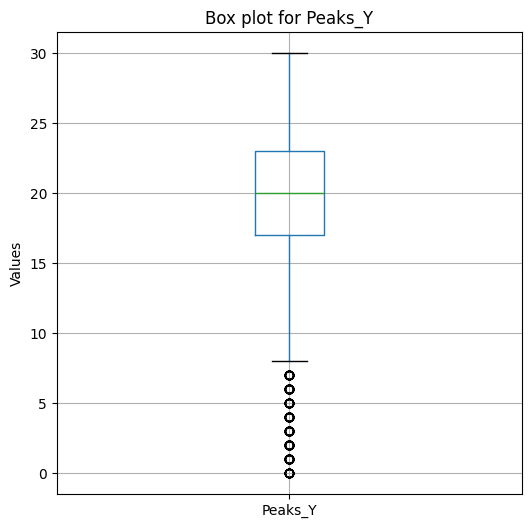

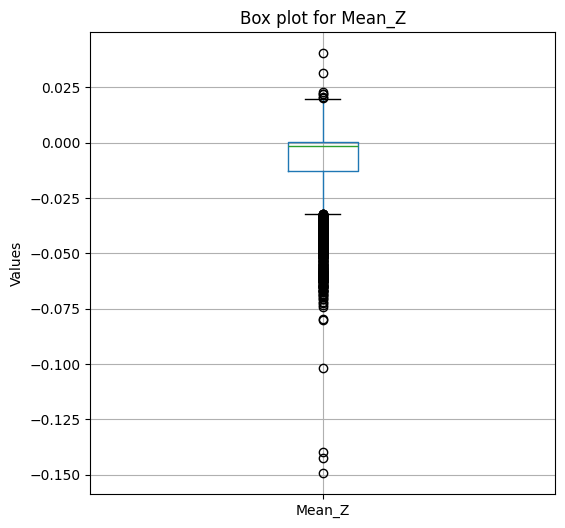

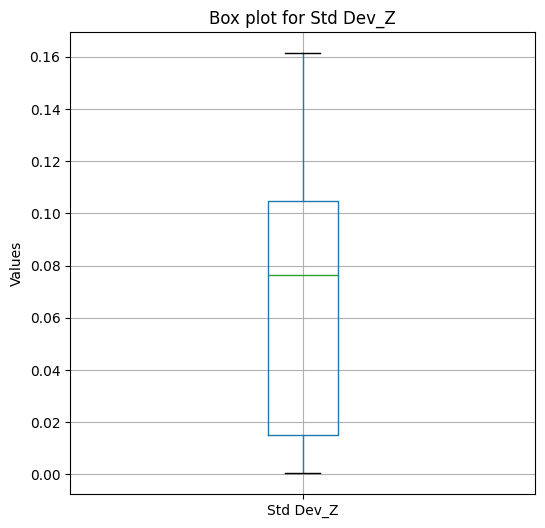

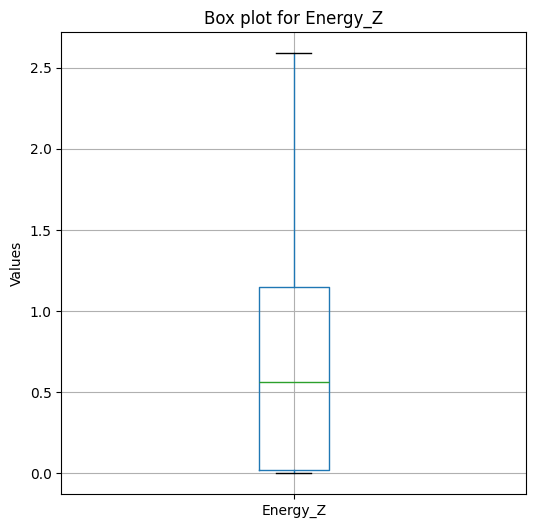

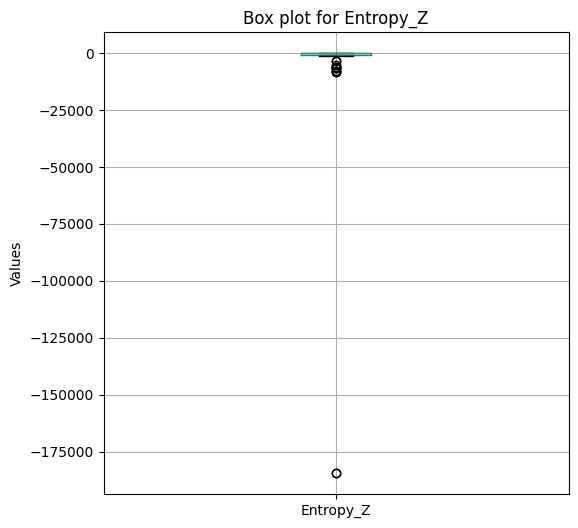

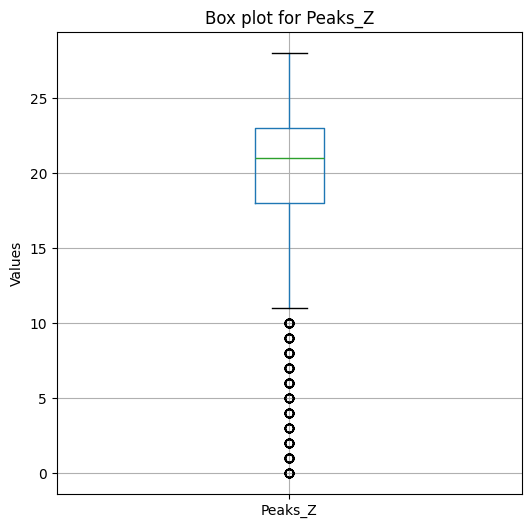

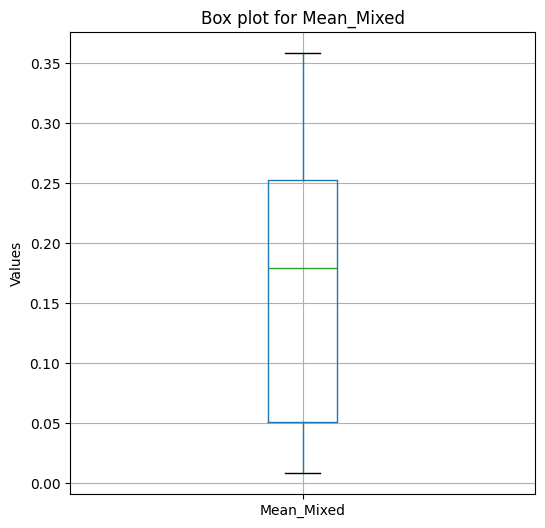

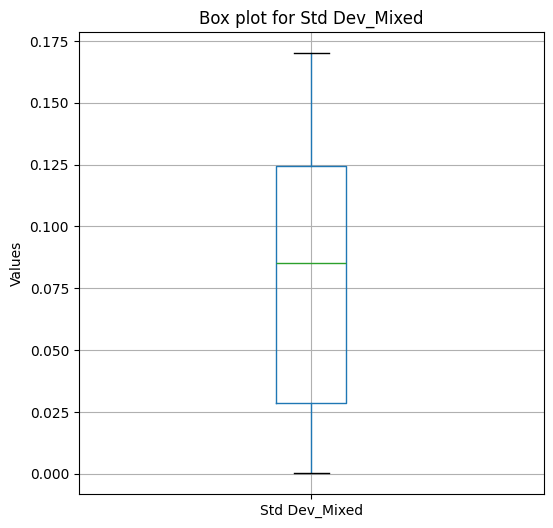

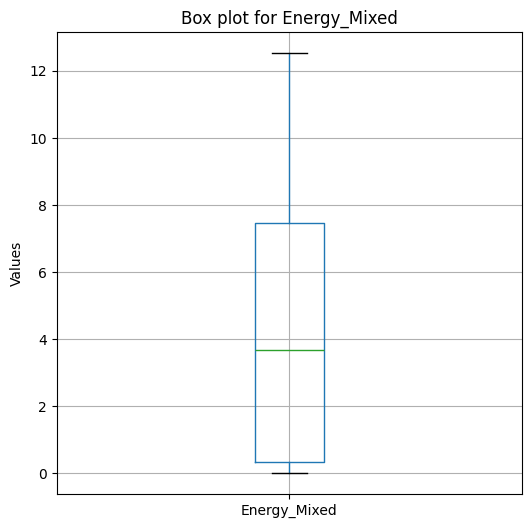

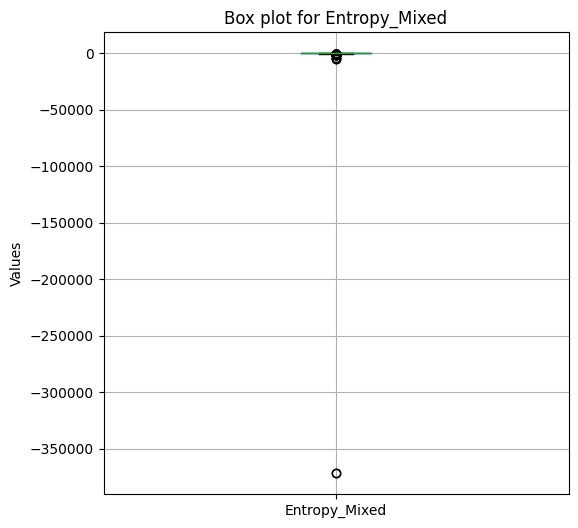

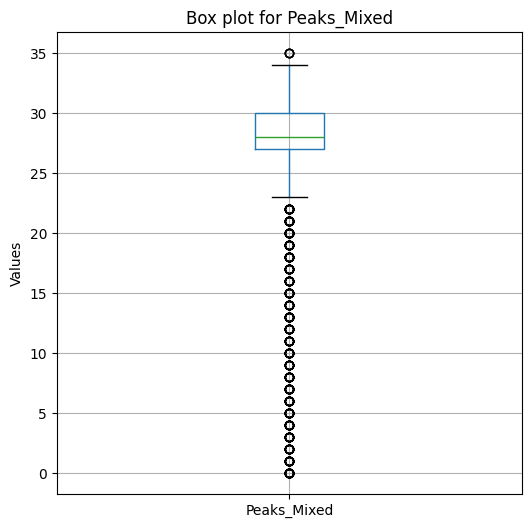

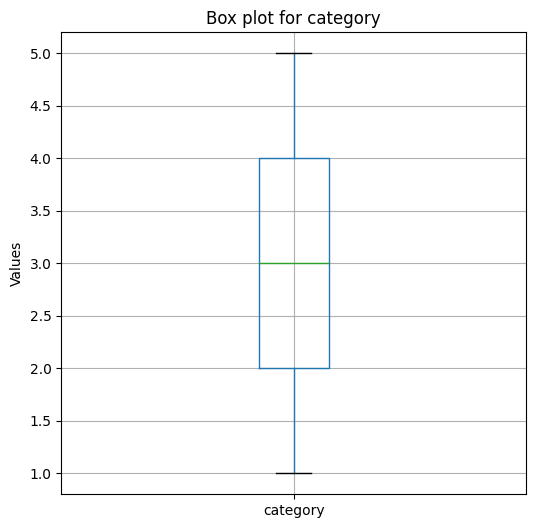

In [4]:
import matplotlib.pyplot as plt

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(6, 6))
    # Create a box plot for the current column
    df.boxplot(column=column)
    plt.title('Box plot for ' + column)
    plt.ylabel('Values')
    plt.show()


In [5]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Save the intermediate DataFrame to a new CSV file
df.to_csv('Dataset/NoInfValues.csv', index=False)

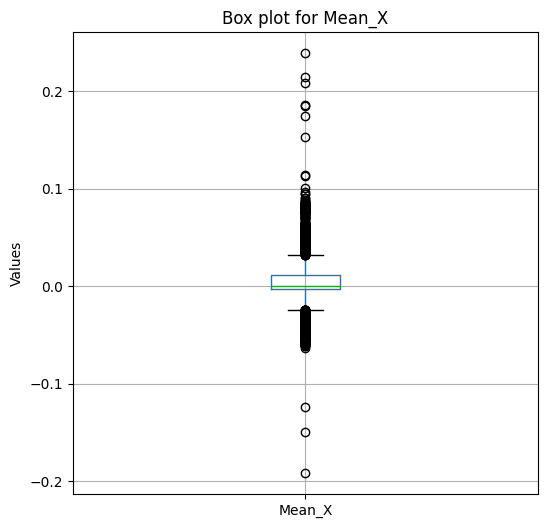

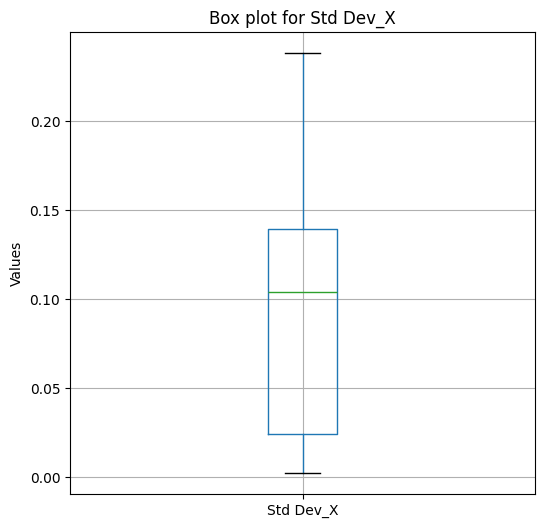

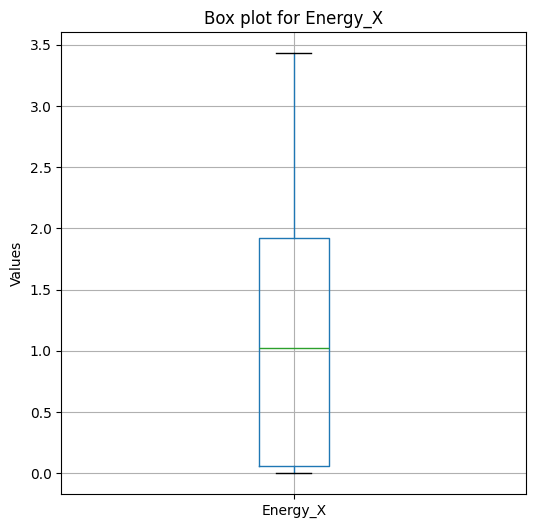

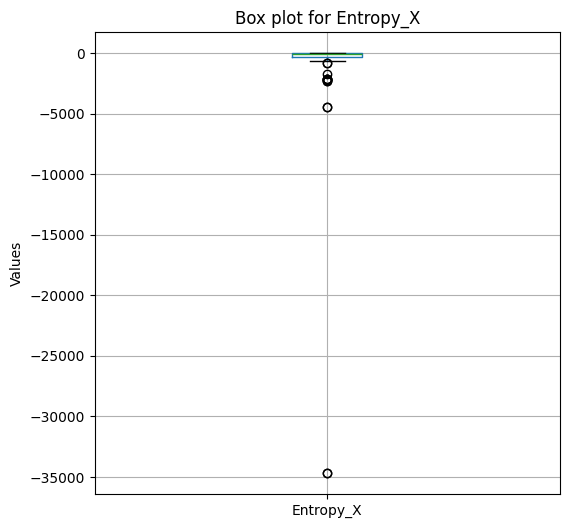

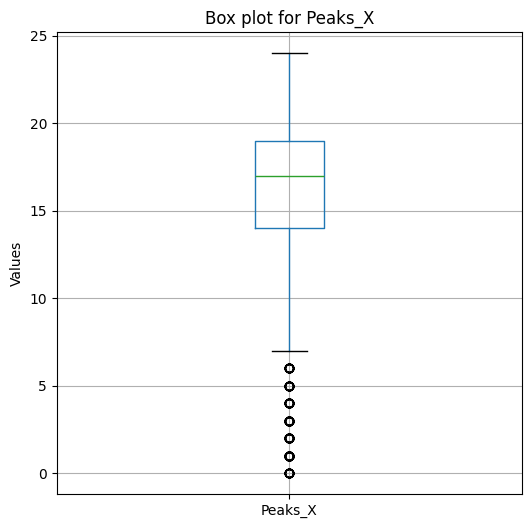

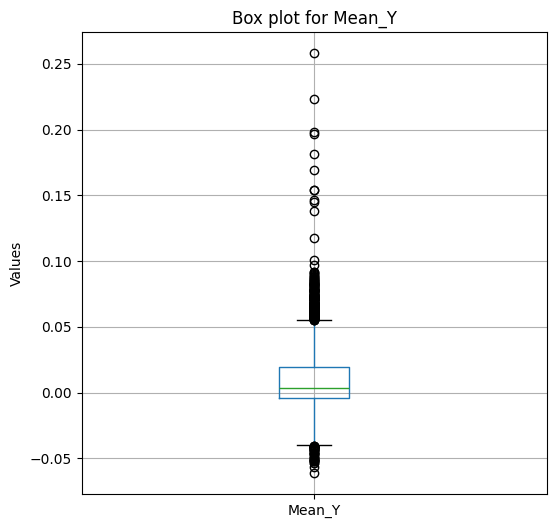

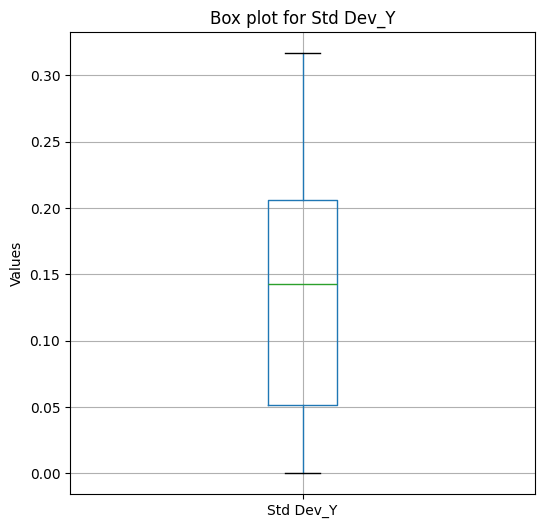

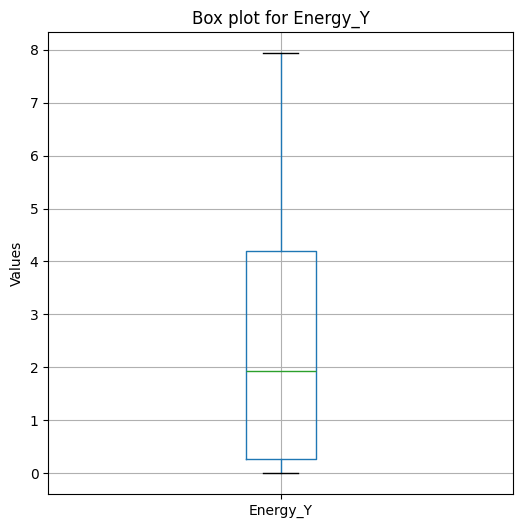

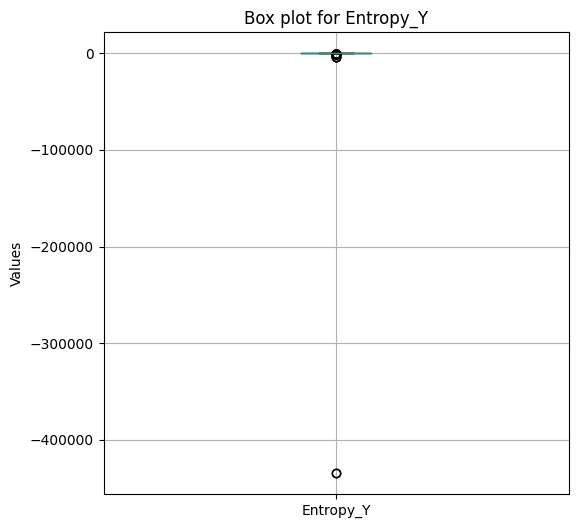

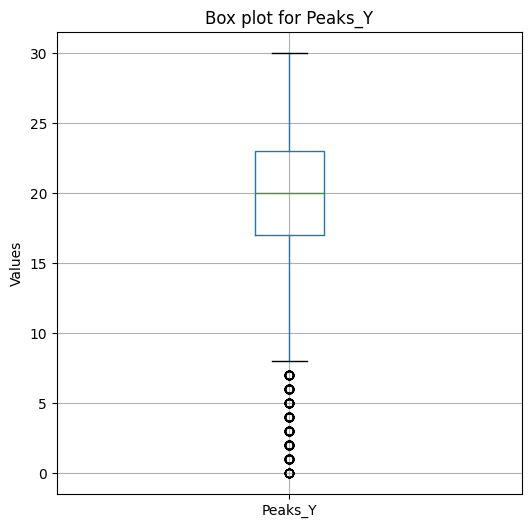

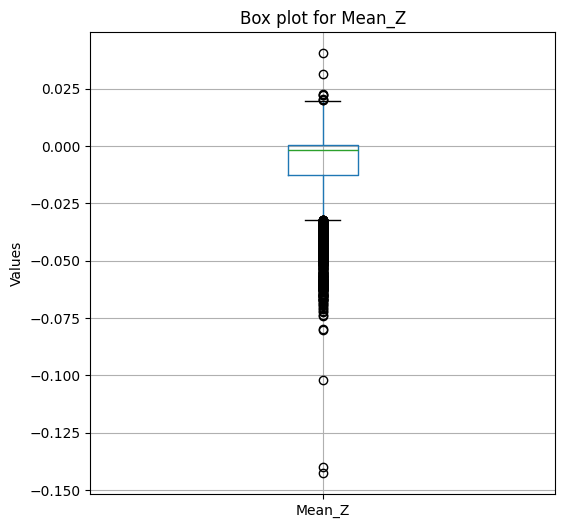

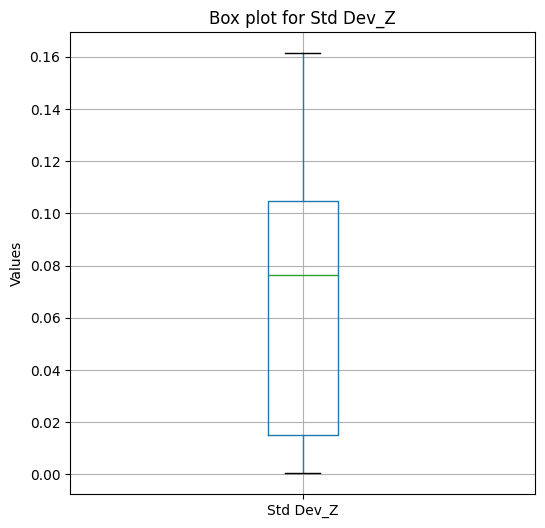

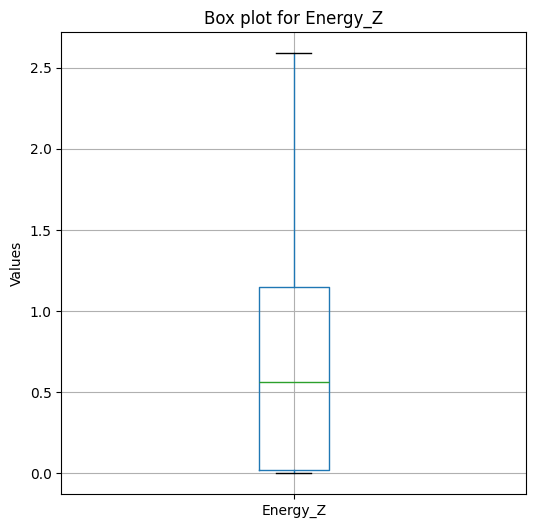

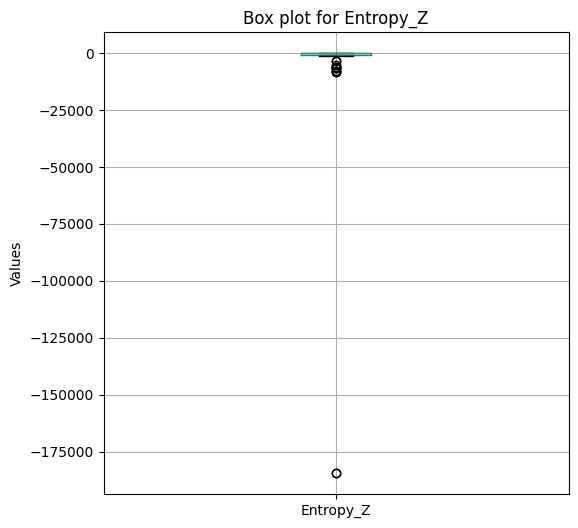

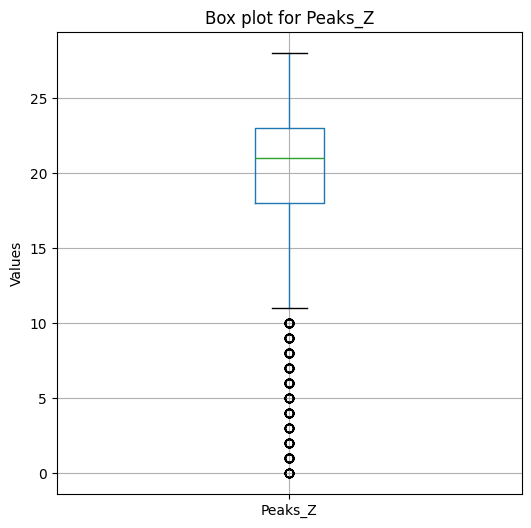

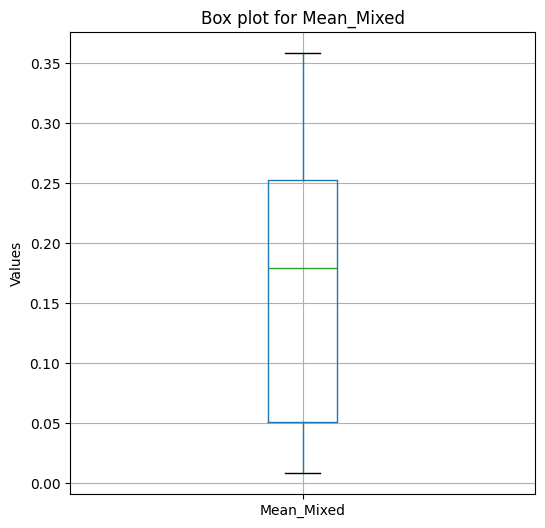

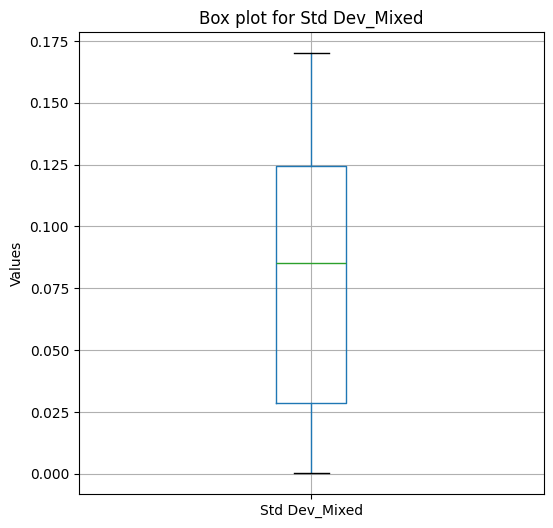

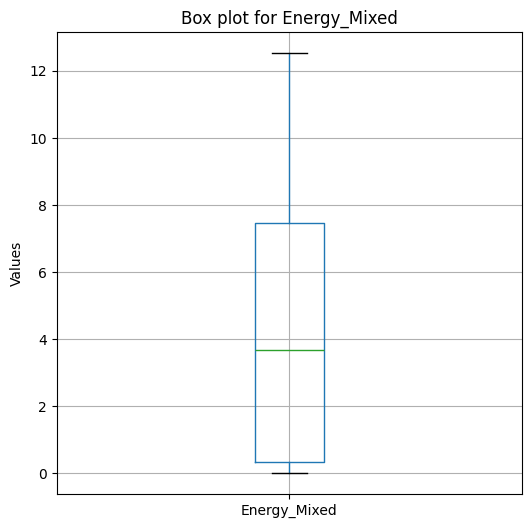

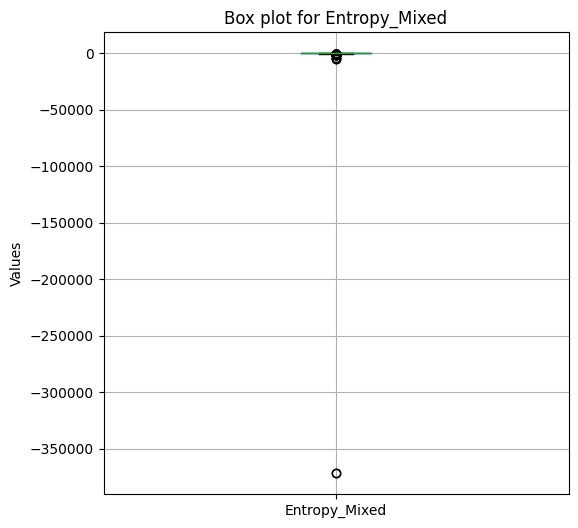

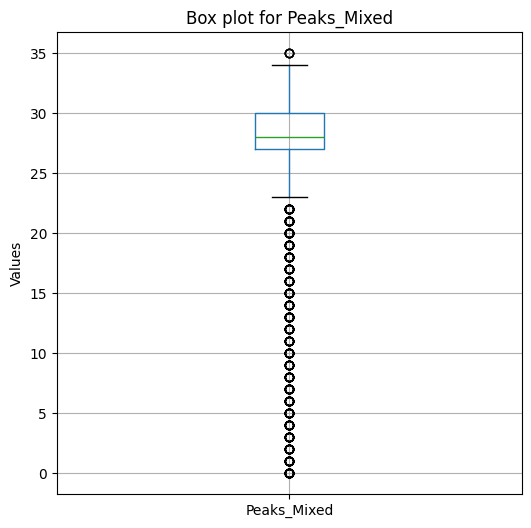

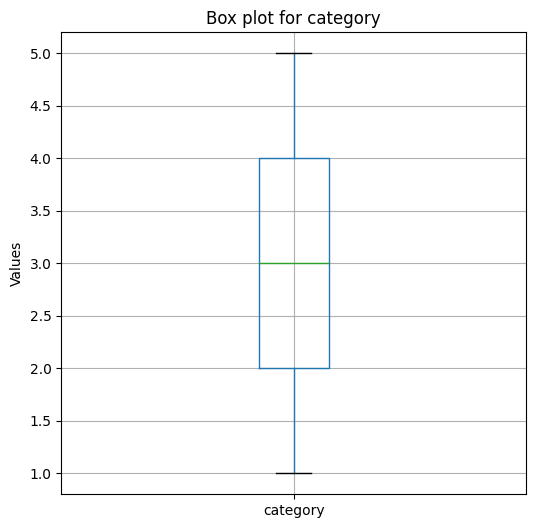

In [6]:
import matplotlib.pyplot as plt

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(6, 6))
    # Create a box plot for the current column
    df.boxplot(column=column)
    plt.title('Box plot for ' + column)
    plt.ylabel('Values')
    plt.show()


In [7]:
# Calculate the Z-scores of each column in the DataFrame
z_scores = np.abs((df - df.mean()) / df.std())

# Define the threshold for an outlier
threshold = 3

# Identify rows that have any column with a Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outlier rows
df_cleaned = df[~outliers]

# Optionally, reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Dataset/CleanedExtractedFeatures.csv', index=False)

# Print the cleaned DataFrame
print(df_cleaned)

        Mean_X  Std Dev_X  Energy_X  Entropy_X  Peaks_X    Mean_Y  Std Dev_Y  \
0     0.025967   0.149649  2.284523 -10.269194       17  0.019115   0.236742   
1     0.024132   0.149547  2.272307 -10.310649       16  0.020332   0.237447   
2     0.021001   0.150147  2.275984  -9.992131       16  0.021384   0.237961   
3     0.019992   0.149930  2.265391 -10.067565       16  0.025724   0.243507   
4     0.019370   0.149982  2.264473 -10.036759       17  0.029207   0.246331   
...        ...        ...       ...        ...      ...       ...        ...   
4032 -0.013915   0.171203  1.268874 -19.135989        4 -0.004061   0.273978   
4033 -0.013488   0.173206  1.267832 -19.592657        4 -0.001808   0.276807   
4034 -0.011979   0.175019  1.261918 -19.405988        4  0.005650   0.275756   
4035 -0.009691   0.176556  1.250728 -19.383567        4  0.013202   0.274749   
4036 -0.005776   0.176994  1.223081 -18.887570        4  0.008070   0.276251   

      Energy_Y  Entropy_Y  Peaks_Y  ...

                 Mean_X  Std Dev_X  Energy_X  Entropy_X   Peaks_X    Mean_Y  \
Mean_X         1.000000   0.194634  0.203712   0.178367  0.441292  0.124831   
Std Dev_X      0.194634   1.000000  0.973698   0.937202 -0.358482  0.394366   
Energy_X       0.203712   0.973698  1.000000   0.850322 -0.368635  0.359993   
Entropy_X      0.178367   0.937202  0.850322   1.000000 -0.206829  0.406382   
Peaks_X        0.441292  -0.358482 -0.368635  -0.206829  1.000000 -0.078542   
Mean_Y         0.124831   0.394366  0.359993   0.406382 -0.078542  1.000000   
Std Dev_Y      0.189902   0.950564  0.910589   0.915869 -0.290013  0.409431   
Energy_Y       0.191565   0.895760  0.888411   0.832305 -0.251089  0.427211   
Entropy_Y      0.178184   0.930590  0.847982   0.977115 -0.218831  0.396822   
Peaks_Y        0.120963   0.356873  0.249919   0.542553  0.266793  0.472702   
Mean_Z        -0.015559  -0.431843 -0.481823  -0.321219  0.230123 -0.237502   
Std Dev_Z      0.205739   0.949621  0.927360   0.896

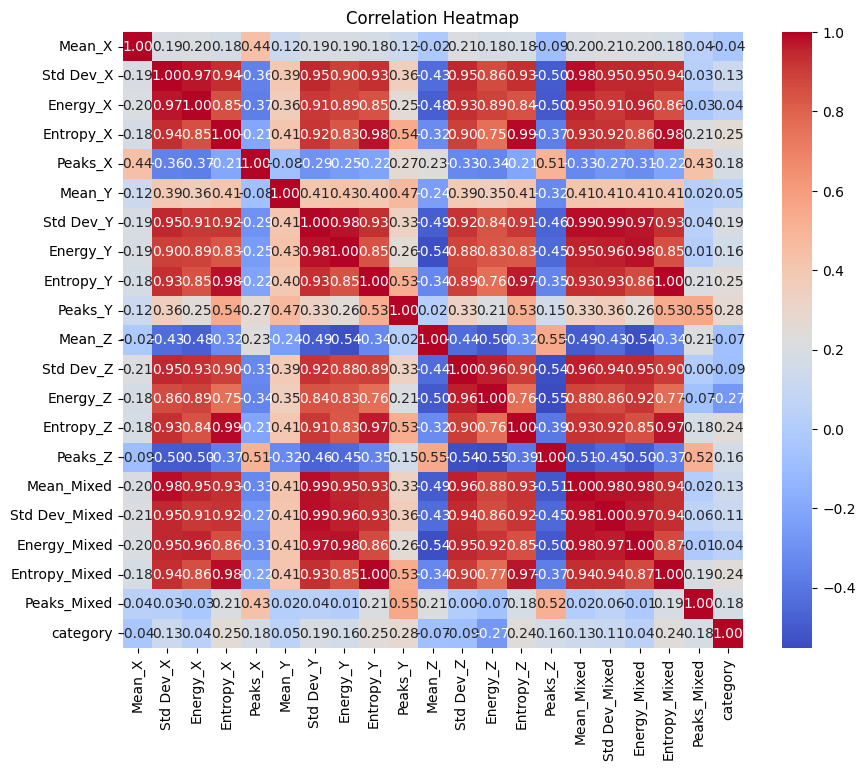

In [8]:
df = pd.read_csv('Dataset\CleanedExtractedFeatures.csv')
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


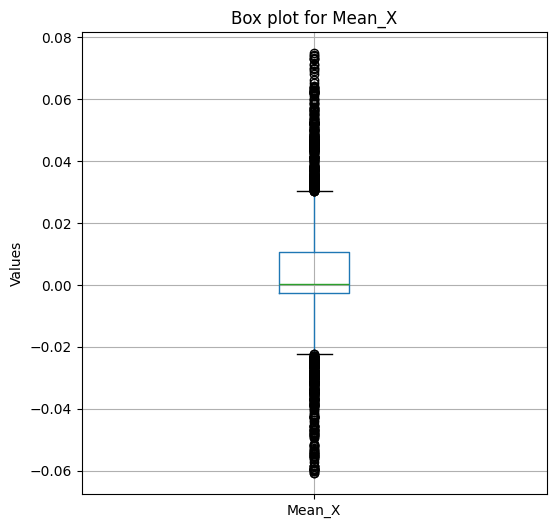

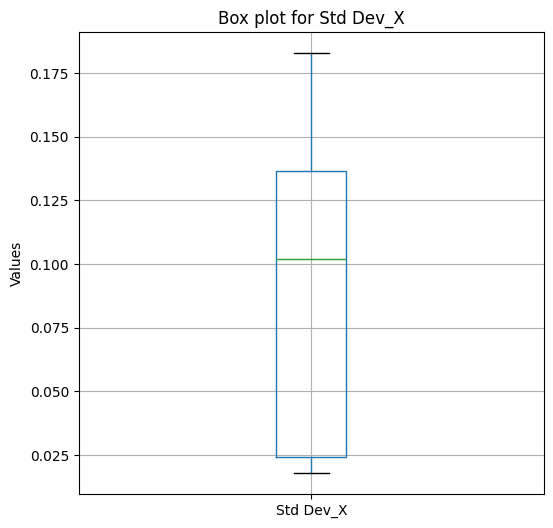

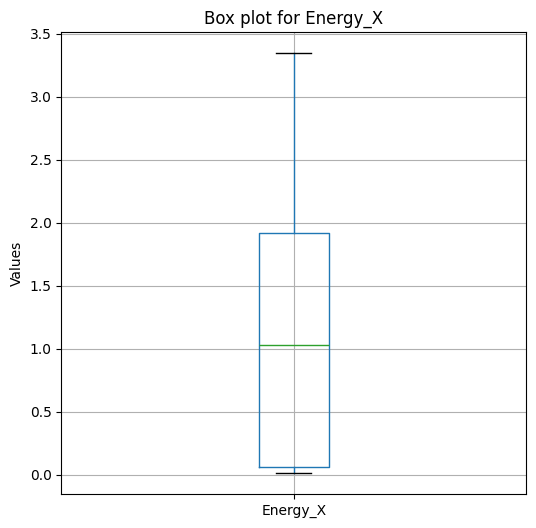

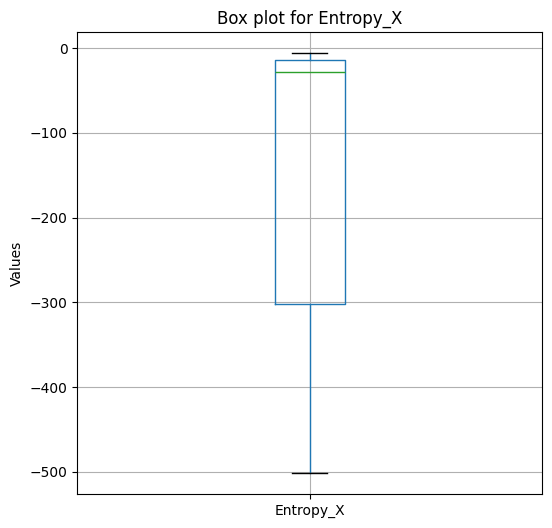

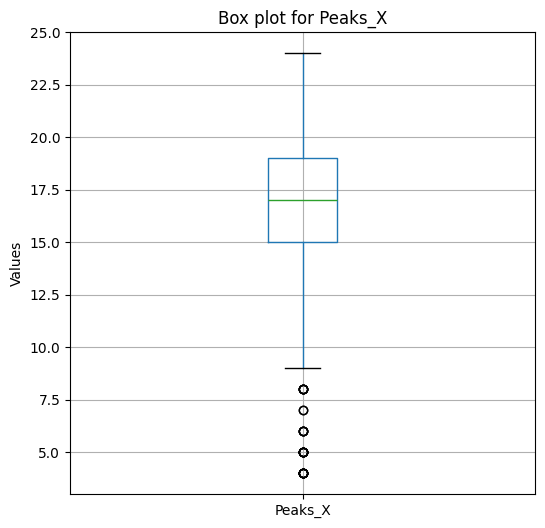

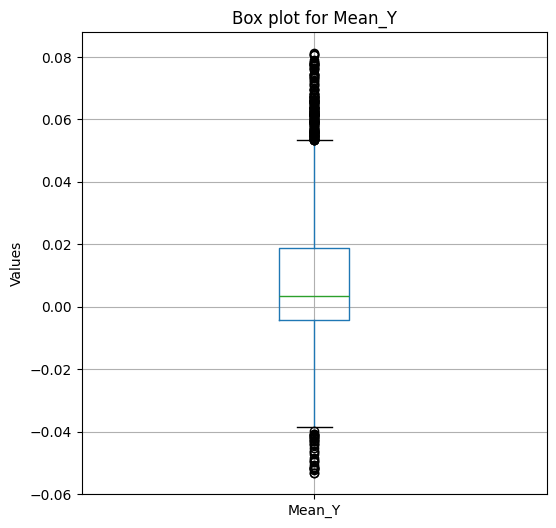

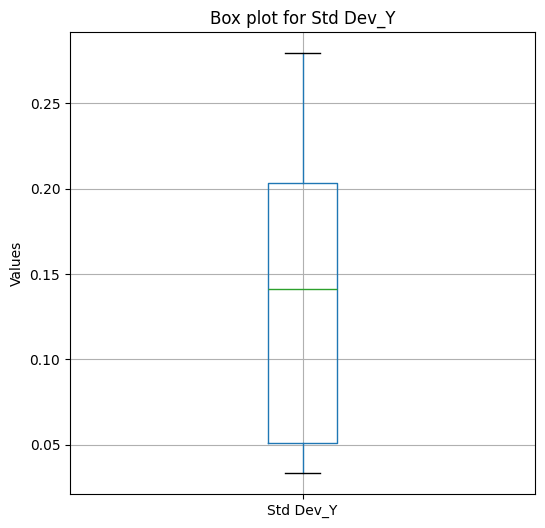

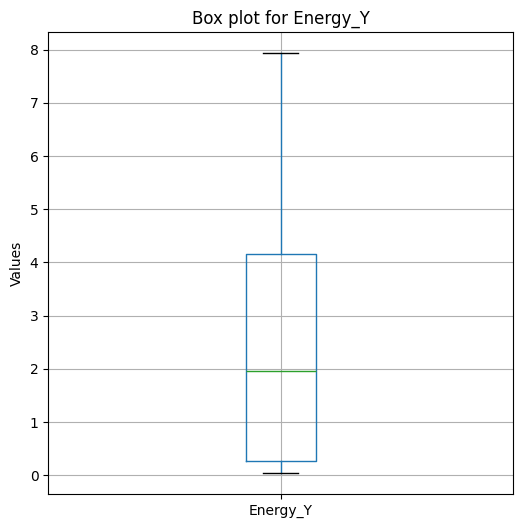

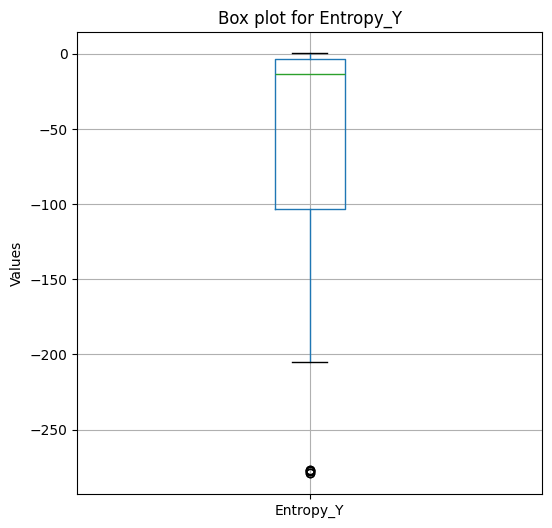

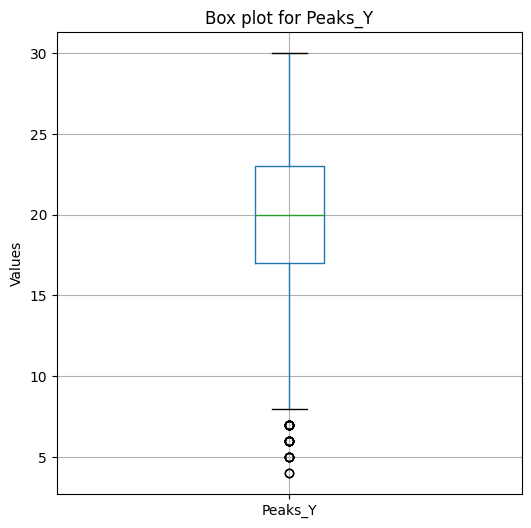

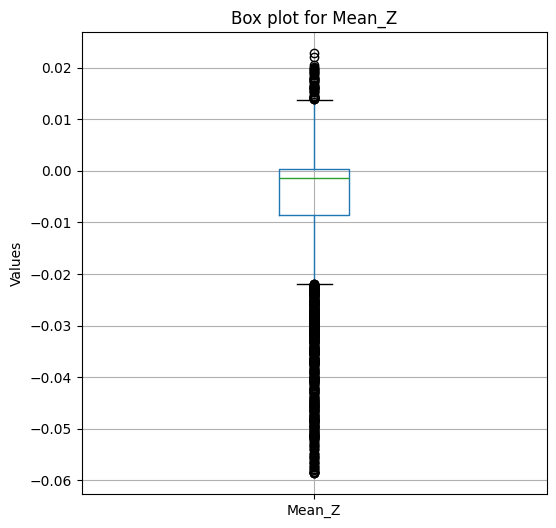

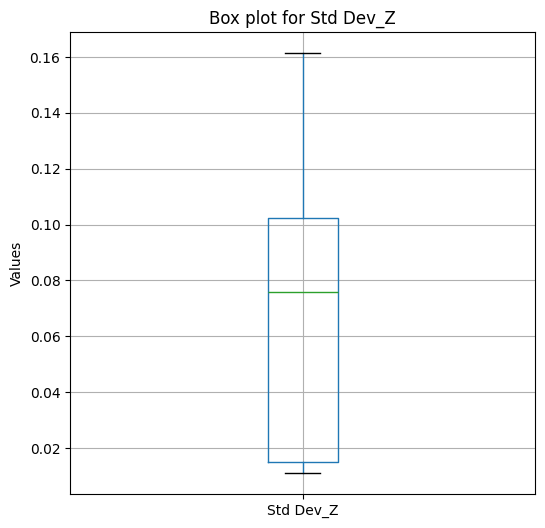

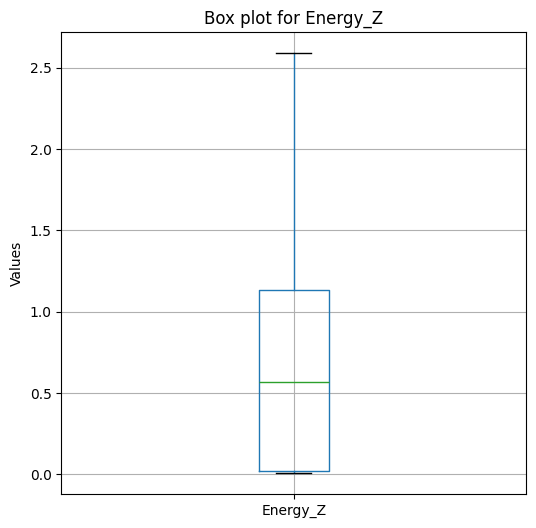

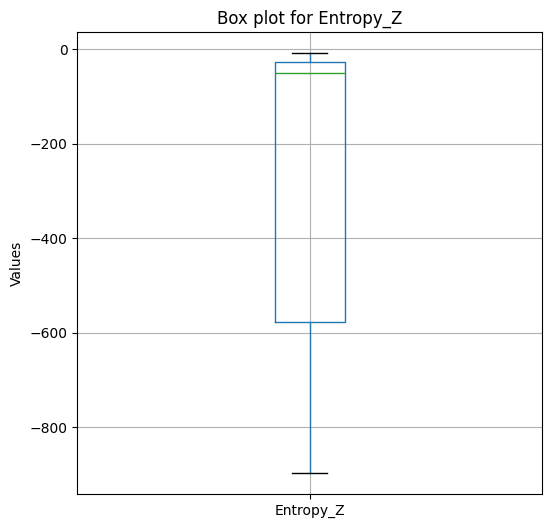

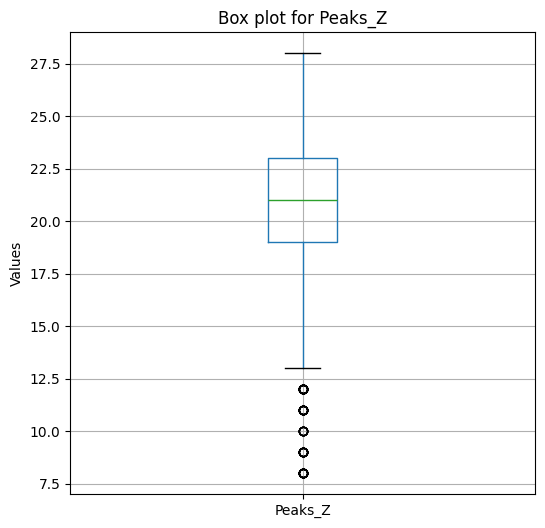

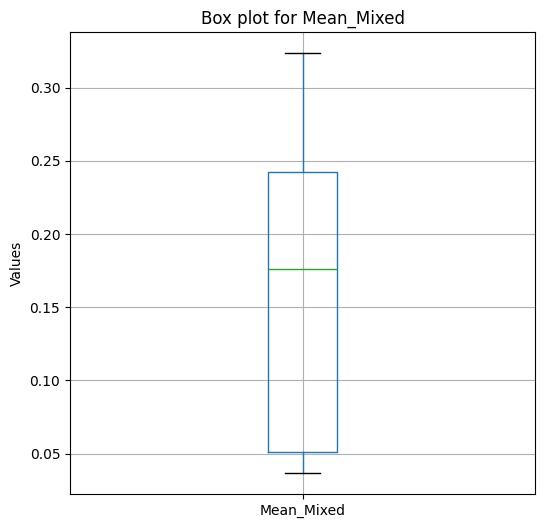

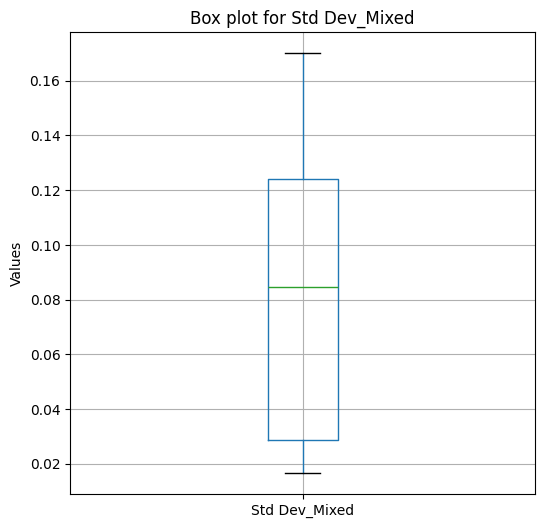

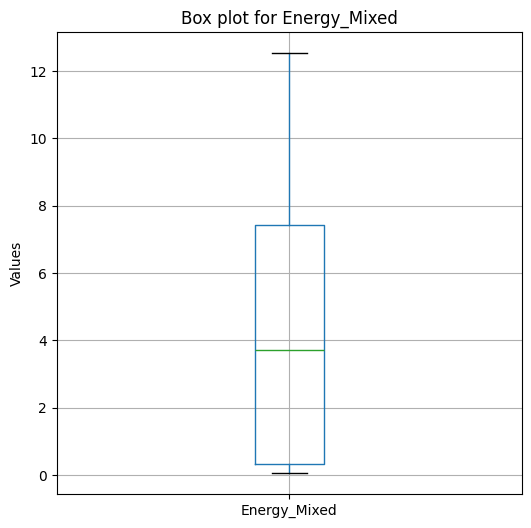

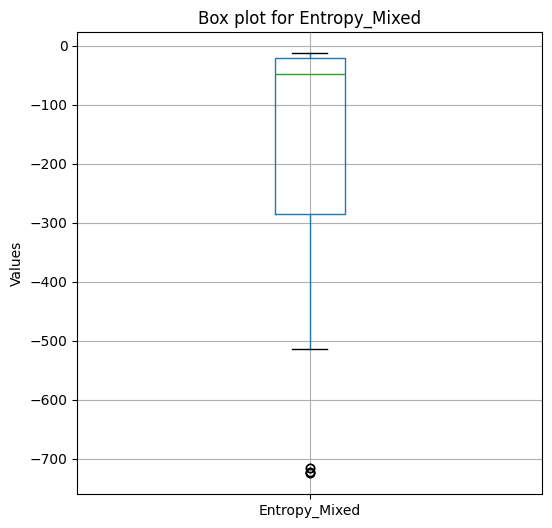

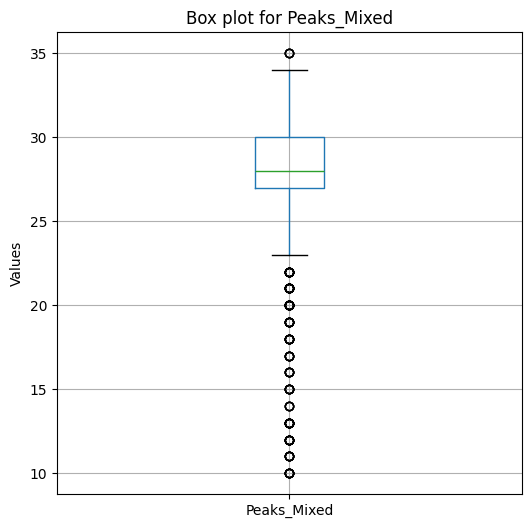

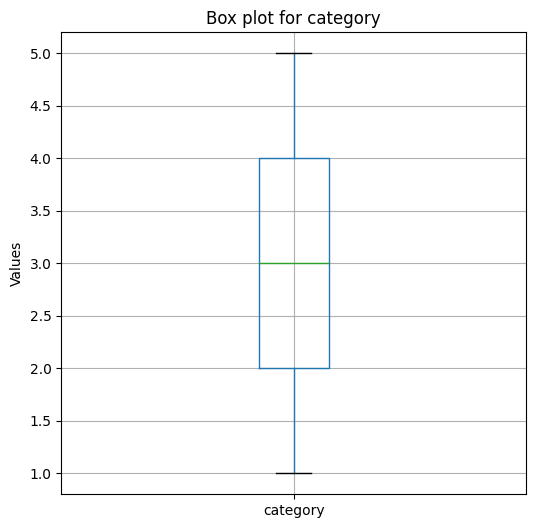

In [9]:

# Iterate over each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(6, 6))
    # Create a box plot for the current column
    df.boxplot(column=column)
    plt.title('Box plot for ' + column)
    plt.ylabel('Values')
    plt.show()